# Performance Analysis

In [4]:
from data_loader import read_market_data
from engine import TradingEngine
from strategies import MomentumStrategy, MovingAverageCrossOver
from reporting import calculate_total_return, calculate_periodic_return, calculate_sharpe_ratio, calculate_max_drawdown, print_performance_report
import matplotlib.pyplot as plt
import statistics
import math

# Constants
FILENAME = 'market_data.csv'
INITIAL_CASH = 10000.0


### The actual Code for the engine

In [ ]:
# Loading the data + Simulation
market_data_ticks = read_market_data(FILENAME)
print(market_data_ticks)

momentum_strategy = MomentumStrategy(window=15)
crossover_strategy = MovingAverageCrossOver(short_window=10, long_window=30)
strategies = [momentum_strategy, crossover_strategy]

engine1 = TradingEngine([momentum_strategy], INITIAL_CASH)
engine2 = TradingEngine([crossover_strategy], INITIAL_CASH)

engine1.run(market_data_ticks)
engine2.run(market_data_ticks)

#### Calculate and display metrics 

In [ ]:

print_performance_report(engine1, "Momentum Strategy")

print_performance_report(engine2, "Crossover Strategy")

##### Plot the 3 Strategies

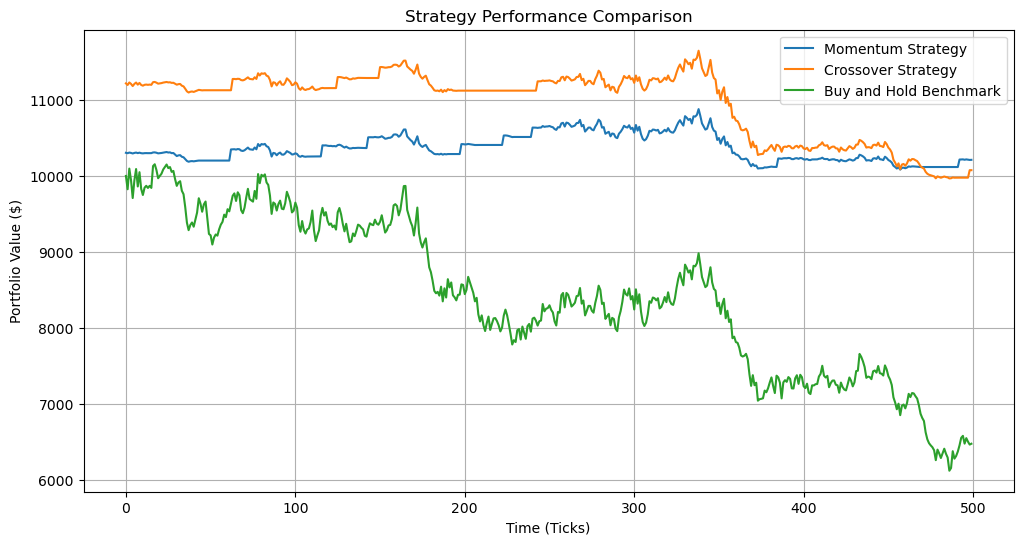

In [ ]:
all_prices = [tick.price for tick in market_data_ticks]
first_price = all_prices[0]
buy_and_hold_equity = [(price / first_price) * INITIAL_CASH for price in all_prices]
plt.figure(figsize=(12, 6))

plt.plot(engine1.equity_curve, label='Momentum Strategy')
plt.plot(engine2.equity_curve, label='Crossover Strategy')
plt.plot(buy_and_hold_equity, label='Buy and Hold Benchmark')

plt.title('Strategy Performance Comparison')
plt.xlabel('Time (Ticks)')
plt.ylabel('Portfolio Value ($)')

plt.legend()
plt.grid(True)
plt.show()

The strategy of mixing both the momentum strategy and the moving average cross over strategy worked alright but the issue is that We could not find a way to signal buying/selling more than one share per signal. So if the initial capital is high then the result will be very flat as most of the value will be in the form of cash at all time. But the total return was around 2.5% which is decent and the sharpe ratio is 1.19 which is decent. As you can see on the graph above, our strategy outperforms the market by a lot so that is very very good and we are happy with that. 